# Playing with Fourier transforms

Have a look at [this page](http://cns-alumni.bu.edu/~slehar/fourier/fourier.html) for most inspiration regarding this notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
%matplotlib inline

Generate a 2D brightness image; note that the minimum brightness is 0 and that no negative values are permitted -- the average brightness is always positive.

In [23]:
def make_img(harmonic,points):
    tmp = np.linspace(0,2*np.pi,points)
    x,xx = np.meshgrid(tmp,tmp)
    x = np.sin(x*2*harmonic+np.pi/2)+1
    return x

Take a look at how the number of points used to compute the sine wave (i.e. the pixels) affects the displayed function. It looks like after about `h=4` the computed wave corresponds to the sum of the one of frequency $1/2h$ plus another of much lower frequency.

In [20]:
@interact(h=(1,20),points=(100,1000))
def plt_sin(h,points):
    tmp = np.linspace(0,2*np.pi,points)
    x = np.sin(tmp*2*h)+1
    fig = plt.figure(figsize=(12,8))
    plt.plot(x)
    plt.plot(x,'o')
    plt.show()

Observe how the FT changes with increasing odd harmonics.

In [27]:
points = 100
@interact(i=(1,10,2))
def ftrans(i=(1)):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(131)
    plt.imshow(make_img(i,points))
    plt.subplot(132)
    ft = np.fft.fft2(make_img(i,points))
    ft_shift_real = np.real(np.fft.fftshift(ft))
    plt.imshow(ft_shift_real,'bwr')
    plt.show()

Summing higher (odd) harmonics of the image simulates encoding into the image higher and higher frequencies. In principle, at some point one reaches the Nyquist frequency, i.e. the max frequency that can be encoded in the image. Clearly this has to do with the pixel size;

In [38]:
points = 100
@interact(i=(3,10,2))
def plt_harmonics(i=3):
    odd_harmonics = np.arange(3,i,2)
    sum_img = make_img(1,points)
    for n in odd_harmonics:
        sum_img = sum_img + make_img(n,points)
    ###
    fig = plt.figure(figsize=(11,3))
    plt.subplot(131)
    plt.imshow(sum_img)
    plt.subplot(132)
    plt.plot(sum_img[50])
    plt.plot(sum_img[50],'x')
    plt.subplot(133)
    ft = np.fft.fft2(sum_img)
    ft_shift_real = np.real(np.fft.fftshift(ft))
    plt.imshow(ft_shift_real,'bwr')
    plt.show()

The FT of a one-pixel delta funcion...

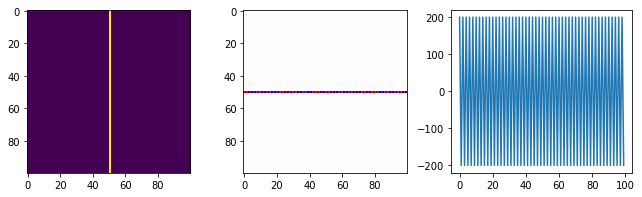

In [41]:
delta = np.zeros((100,100))
delta[:,50]=2
fig = plt.figure(figsize=(11,3))
plt.subplot(131)
plt.imshow(delta)
plt.subplot(132)
ft = np.fft.fft2(delta)
ft_shit_real = np.real(np.fft.fftshift(ft))
plt.imshow(ft_shit_real,'bwr')
plt.subplot(133)
plt.plot(ft_shit_real[50])
plt.show()